# <center>DECISION TREE and RANDOM FOREST</center>
# I. Background
Prediction problem in this project is to do binary classification using Decision Tree and Random Forest.
## Prediction problem
Typical problems in training problems are:

- Ovefitting model: this happens where the training model is too flexible with data in training set and consequently fail to give good prediction on unseen data in test set
- Underfitting model: in contrast with overfitting, training model is not flexible enough. It becomes too general to capture useful feature in test set in order to produce good prediction

## Decision Tree
Decision Tree can do both classification and regression problems. It takes feature vector of k dimension as input in its first node. At each node, it splits based on the value of a feature in feature vector. This process will continue until it reaches its terminal nodes. At these terminal nodes, Decision Tree returns the output of the training process.

In a regression problem, the result of each node is the average value of all outcomes from samples in that node.

In a classification problem, the result of each node is the probability of each class in that node.

### Decision Tree model from sklearn
Decision Tree model used in this project is **sklearn.tree.DecisionTreeClassifier**

Main parameters of this model includes:
- criterion: criterion measures how good a split is, or in other words, it is used to measure the loss function with the aim to minimize this loss function. Two methods used for this measure is Gini impurity ("gini") and information gain ("entropy"). For this project, entropy will be used.
- max_depth: this parameter sets the maximum depth of the Decision Tree. By default, the Decision Tree will expand until all leaves reaches the lowest loss value. If parameter *min_samples_split* is set, then the Decision Tree will stop when each node reach a certain number of samples.
- min_samples_split: The minimum number of samples required to split a node
- min_samples_leaf: The minimum number of samples to be remained at a node after a split. If after splitting, the number of samples at each left and right branches is less than this minimum, then there would be no split at that node.
- max_features: The maximum number of features involved in making the best split.

### Problem of Decision Tree
Common problem of Decision Tree is overfitting. Assume no parameter is set for the maximum depth of the tree, then the model will keep splitting nodes until it reaches the lowest loss value possible. This makes the model closely fits to the training data. As a consequence, this model's generalization decreases and it will be worse at giving predction on testing set.

In order to avoid overfitting in Decision Tree, after training the model, we can prune the tree to make it less complicated. By pruning, we remove branches that are not responsible for the model's overall prediction power. Few examples of pruning the Decision Tree:
- reduce the depth of the tree to force it stop splitting earlier
- reduce the number of features to consider in splitting nodes
- increase the minimum number of samples required at each node before splitting
- increase the minimum number of samples to be at each node after splitting also prevent the decision tree from getting wider

Another way of fixing overfitting in Decision Tree is to use Random Forest

## Random Forest
Same as in Decision Tree, Random Forest can also handle both regression and classification problems. The idea is to train a group of decision trees and take the average of outcomes from all these trees. Each tree in Random Forest uses a different set of features randomly. We will end up having different trees with different outcomes. By taking average of these trees, we can improve results of Decision Tree.

Since Random Forest involves multiple decision trees on the same data set, it is possible that these trees are correlated to each other. This can be avoided by only selecting some features randomly to split node. That means each tree in Random Forest does not use the same set of features. 

In Random Forest, we can also use bootstrapping to create different training sets for trees. This is done by sampling with replacement on the original training data. All these new training sets have the same size. By doing this, we can have different trees for different data set. We might have various overfitting trees in Random Forest but since each tree is built on diffferent training set and as we take the average of these trees, we can reduce the level of overfitting in overall.
### Random Forest model from sklearn
Random Forest model used in this project is **sklearn.ensemble.RandomForestClassifier**
Since Random Forest is an ensemble of decision trees, it shares many same parameters with Decision Tree, including the all parameters that are mentioned in Decision Tree part above.

Other main parameters of this model that are different from Decision Tree includes:
- n-estimators: number of trees in the ensemble
- bootstrap: When set to True, Random Forest will only use a subset of data to build trees. When set to False, the whole data will be used to train trees.

## Action plan:
1. Train 2 models on the same training set, using the same number of features
2. Test 2 models on the same testing set
3. Compare the accuracy of each method on the prediction results
4. Comment on the difference of each method

# II. Data
## Overview of data used
Data used in this project is the Chicago crime data of 2017, obtained from https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

The original data set is from 2001 to present. For the purpose of this project, this data set was filtered for 2017 only.
Full description of features in this data set can also be found in the link above. Below is the description of main features that are of interest to this project:

- *Date*: Date when the incident occurred. This is sometimes a best estimate.
- *Primary Type*: The primary description of the IUCR code which stands for The Illinois Unifrom Crime Reporting code.
- *Location Description*: Description of the location where the incident occurred.
- *Arrest*: Indicates whether an arrest was made.
- *Domestic*: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
- *Beat*: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. Three to five beats make up a police sector, and three sectors make up a police district. The Chicago Police Department has 22 police districts
- *District*: Indicates the police district where the incident occurred.
- *Ward*: The ward (City Council district) where the incident occurred.
- *Community Area*: Indicates the community area where the incident occurred. Chicago has 77 community areas
- *Latitude, Longitude*: The latitude and longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.

In this project, *Primary Type* is the target. This includes various crime types. *Theft* is picked as the label of interest. Hence, the purpose of this project is to train model that can predict whether the incident is *Theft* or not.

## Data processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
import datetime
from datetime import datetime
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv("Crimes_-_2017.csv")
data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11116418,JA460808,01/01/2017 12:01:00 AM,005XX W 31ST ST,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,False,True,...,11.0,60.0,02,1173033.0,1884362.0,2017,06/03/2019 04:14:23 PM,41.838119,-87.640555,"(41.838118825, -87.640555028)"
1,11120529,JA473898,10/08/2017 09:00:00 PM,113XX S AVENUE M,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,...,10.0,52.0,02,1201564.0,1830343.0,2017,06/03/2019 04:14:23 PM,41.689208,-87.537697,"(41.689208485, -87.53769718)"
2,11181700,JA548293,12/10/2017 09:50:00 AM,062XX S HERMITAGE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,...,15.0,67.0,17,1165747.0,1863390.0,2017,08/26/2019 04:06:17 PM,41.780727,-87.667887,"(41.780727412, -87.667886613)"
3,11020990,JA351818,07/13/2017 04:00:00 PM,065XX S MOZART ST,1791,OFFENSE INVOLVING CHILDREN,HARBOR RUNAWAY,RESIDENCE,True,False,...,17.0,66.0,20,1158505.0,1861124.0,2017,06/04/2019 04:01:14 PM,41.774660,-87.694499,"(41.774659906, -87.694499017)"
4,11079431,JA421425,09/04/2017 12:00:00 AM,048XX S SEELEY AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,...,15.0,61.0,02,1163510.0,1872501.0,2017,06/04/2019 04:01:14 PM,41.805776,-87.675832,"(41.805776361, -87.675832432)"


In [3]:
data['Theft'] = data['Primary Type'].apply(lambda x: 1 if x == 'THEFT' else 0)
Y = data['Theft']
X = data.drop(['Primary Type','Theft','ID','Case Number','Block','IUCR',
               'Description','FBI Code','X Coordinate','Y Coordinate',
              'Year','Updated On','Location'], axis = 1)
X['Date'] = [datetime.strptime(d, "%m/%d/%Y %I:%M:%S %p") for d in X["Date"]]
X['Time'] = X['Date'].dt.hour + X['Date'].dt.minute/60 + X['Date'].dt.second/360
X['wDay'] = [datetime.strftime(d, "%a") for d in X['Date']]
X['mDay'] = [datetime.strftime(d, "%d") for d in X['Date']]
X['Month'] = [datetime.strftime(d, "%b") for d in X['Date']]
X = X.drop(['Date'], axis = 1)
col_val = X.columns.values
for i in col_val:
    X[i].fillna(X[i].mode()[0],inplace = True)
X['Arrest'] = pd.factorize(X['Arrest'])[0]
X['Domestic'] = pd.factorize(X['Domestic'])[0]
X['wDay'] = pd.factorize(X['wDay'])[0]
X['mDay'] = pd.factorize(X['mDay'])[0]
X['Month'] = pd.factorize(X['Month'])[0]
X.rename(columns={'Location Description':'Loc'}, inplace=True)
X['Loc'] = pd.factorize(X['Loc'])[0]
X.head()

,Loc,Arrest,Domestic,Beat,District,Ward,Community Area,Latitude,Longitude,Time,wDay,mDay,Month
0,0,0,0,915,9.0,11.0,60.0,41.838119,-87.640555,0.016667,0,0,0
1,0,0,0,433,4.0,10.0,52.0,41.689208,-87.537697,21.000000,0,1,1
2,0,0,0,714,7.0,15.0,67.0,41.780727,-87.667887,9.833333,0,2,2
3,0,1,1,831,8.0,17.0,66.0,41.774660,-87.694499,16.000000,1,3,3
4,0,0,0,931,9.0,15.0,61.0,41.805776,-87.675832,0.000000,2,4,4


In [4]:
X_train, X_test, Y_train, Y_test = sk.model_selection.train_test_split(X,Y, test_size = .2)
X_train, X_val, Y_train, Y_val = sk.model_selection.train_test_split(X_train,Y_train, test_size = .2)
X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape

((169035, 13), (169035,), (42259, 13), (42259,), (52824, 13), (52824,))

# III. Train and test models on data set
## Decision Tree

### First run model with default parameters

In [5]:
tree_clf_df = tree.DecisionTreeClassifier(criterion = 'entropy')

In [6]:
tree_clf_df.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [7]:
Y_train_tree = tree_clf_df.predict(X_train)
print("Accuracy: ",round(metrics.accuracy_score(Y_train,Y_train_tree)*100,2),"%")

Accuracy:  99.8 %


In [8]:
Y_val_tree = tree_clf_df.predict(X_val)
print("Accuracy: ",round(metrics.accuracy_score(Y_val,Y_val_tree)*100,0),"%")

Accuracy:  73.0 %


The model works too well on the training set. It almost fits perfectly to the training set. This indicates the model could be overfitting. Testing the model on validation set only returned accuracy of 73%. Pruning is done in next step to see whether the accuracy can be improved

### Pruning tree

Two sets of parameters are used for pruning tree as below.
- Set limit for the max_depth
- Increase number of both min_samples_split and min_samples_leaf
- Limit the number of features used to decide best split

In [9]:
max_depth = [5,10]
criterion = ['entropy','entropy']
min_samples_split = [400,800]
min_samples_leaf = [200, 400]
max_features = [3,5]

param_key = ['criterion', 'min_samples_split', 'min_samples_leaf', 'max_features']
param_val = np.stack((criterion, min_samples_split, min_samples_leaf, max_features),axis = -1)
n = len(max_depth)

In [10]:
#%% TRAIN MODEL
accuracy = 0.0
accr_idx = [100,100]

for e in range(n):
    for i in range(n):    
        tree_clf = tree.DecisionTreeClassifier(criterion=criterion[i], max_depth=max_depth[e], 
                                       min_samples_split=min_samples_split[i], min_samples_leaf=min_samples_leaf[i], 
                                        max_features=max_features[i])
        tree_clf.fit(X_train,Y_train)
        prediction_tree = tree_clf.predict(X_val)
        accr_i = metrics.accuracy_score(Y_val,prediction_tree)
        if accr_i > accuracy:
            accuracy = accr_i
            accr_idx = [e,i]
           
        print('Model result using max_depth = ' + str(max_depth[e]) + ' and parameter set ' + str(i+1) + 
              ': Accuracy: '+ str(round(accr_i*100,0)) + '%' )

best_param = dict(zip(param_key,param_val[accr_idx[1]]))
print("\nOptimal accuracy: " + str(round(accuracy*100,0)))
print("\nBest parameters: \nmax_depth: " + str(max_depth[accr_idx[0]]) + 
      " and set " + str(accr_idx[1]+1) + ":\n"  + str(best_param))

Model result using max_depth = 5 and parameter set 1: Accuracy: 77.0%
Model result using max_depth = 5 and parameter set 2: Accuracy: 77.0%
Model result using max_depth = 10 and parameter set 1: Accuracy: 78.0%
Model result using max_depth = 10 and parameter set 2: Accuracy: 79.0%

Optimal accuracy: 79.0

Best parameters: 
max_depth: 10 and set 2:
{'criterion': 'entropy', 'min_samples_split': '800', 'min_samples_leaf': '400', 'max_features': '5'}


After pruning, the accuracy increase to 78%. This set of parameter will be used to train the model

In [11]:
s = accr_idx[1]
tree_clf_best = tree.DecisionTreeClassifier(max_depth=max_depth[accr_idx[0]], criterion=criterion[s],
                                    min_samples_split=min_samples_split[s], min_samples_leaf=min_samples_leaf[s], 
                                        max_features=max_features[s])
tree_clf_best.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=400, min_samples_split=800,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Accuracy and important features**

In [12]:
Y_train_tree = tree_clf_best.predict(X_train)
print("Accuracy: ",round(metrics.accuracy_score(Y_train,Y_train_tree)*100,2),"%")

Accuracy:  78.05 %


In [13]:
Y_test_tree = tree_clf_best.predict(X_test)
print("Accuracy: ",round(metrics.accuracy_score(Y_test,Y_test_tree)*100,0),"%")

Accuracy:  78.0 %


In [14]:
imp = pd.Series(tree_clf_best.feature_importances_,index = X_train.columns).sort_values(ascending=False)
imp

Loc               0.265289
Domestic          0.251043
Arrest            0.171247
Ward              0.160150
Latitude          0.047510
Beat              0.032408
Time              0.025075
Longitude         0.019339
District          0.019032
Community Area    0.006460
mDay              0.001039
wDay              0.000756
Month             0.000652
dtype: float64

The accuracy on test set is only 1% lower than the accuracy on validation set. The accuracy on validation set is consistent with that of training set, which means pruning has fixed overfitting and hence increase accuracy of the model on test set. Below are two decision trees from the above two models. Tree before pruning is much larger than tree after pruning

Tree before pruning

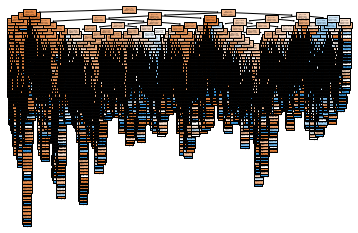

In [33]:
tree.plot_tree(tree_clf_df, filled = True);

Tree after pruning

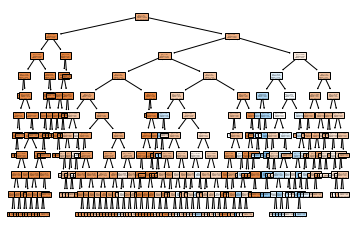

In [32]:
tree.plot_tree(tree_clf_best, filled = True);

## Random Forest
Random Forest is used to see whether it can improve the accuracy in Decision Tree

### First run Random Forest using default parameters

In [15]:
rf_clf_df = RandomForestClassifier(n_estimators = 100)
rf_clf_df.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Accuracy on training and validation set**

In [16]:
Y_train_rf = rf_clf_df.predict(X_train)
print("Accuracy: ",round(metrics.accuracy_score(Y_train,Y_train_rf)*100,2),"%")

Accuracy:  99.79 %


In [17]:
Y_val_rf = rf_clf_df.predict(X_val)
print("Accuracy: ",round(metrics.accuracy_score(Y_val,Y_val_rf)*100,2),"%")

Accuracy:  79.98 %


The accuracy using default parameter is already higher than in Decision Tree. However, this model is still overfitting as accuracy on training set is very high and almost 20% higher than accuracy on validation set. In the next part, parameters are tuned to see whether Random Forest can perform better than this

### Tuning the parameters

The default n_estimators is 100. In this part, number of trees is reduced to 20 and 50.

For each n_estimators value, two sets of parameters are trained:
- max_depth is limit at 10 and 20
- both min_samples_split and min_samples_leaf increase to prevent each tree from becoming too large
- max_features is limit at 4 and 8 features
- bootstrap is used to ensure randomness in splitting training set

In [18]:
n_estimators = [20,50]
criterion = ['entropy','entropy']
max_depth = [10,20]
min_samples_split = [40,80]
min_samples_leaf = [20,40]
max_features = [4,8]
bootstrap = [True,True]

param_key = ['criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'max_features','bootstrap']
param_val = np.stack((criterion, max_depth, min_samples_split, min_samples_leaf, max_features, bootstrap),axis = -1)
n = len(n_estimators)

In [19]:
#%% TRAIN MODEL
accuracy = 0.0
accr_idx = [100,100]
for e in range(n):
    for i in range(n):    
        rf_clf = RandomForestClassifier(n_estimators=n_estimators[e], criterion=criterion[i], max_depth=max_depth[i], 
                                       min_samples_split=min_samples_split[i], min_samples_leaf=min_samples_leaf[i], 
                                       max_features=max_features[i], bootstrap=bootstrap[i])

        rf_clf.fit(X_train,Y_train)
        prediction_rf = rf_clf.predict(X_val)
        accr_i = metrics.accuracy_score(Y_val,prediction_rf)
        if accr_i > accuracy:
            accuracy = accr_i
            accr_idx = [e,i]
           
        print('Model result using n_estimators=' + str(n_estimators[e]) + ' and parameter set' + str(i+1) + 
              ': Accuracy: '+ str(round(accr_i*100,2)) + '%' )

best_param = dict(zip(param_key,param_val[accr_idx[1]]))
print("\nOptimal accuracy: " + str(round(accuracy*100,0)))
print("\nBest parameters: \nn_estimators: " + str(n_estimators[accr_idx[0]]) + 
      " and set " + str(accr_idx[1]+1) + ":\n"  + str(best_param))

Model result using n_estimators=20 and parameter set1: Accuracy: 79.33%
Model result using n_estimators=20 and parameter set2: Accuracy: 80.44%
Model result using n_estimators=50 and parameter set1: Accuracy: 79.28%
Model result using n_estimators=50 and parameter set2: Accuracy: 80.43%

Optimal accuracy: 80.0

Best parameters: 
n_estimators: 20 and set 2:
{'criterion': 'entropy', 'max_depth': '20', 'min_samples_split': '80', 'min_samples_leaf': '40', 'max_features': '8', 'bootstrap': 'True'}


**Fit the model using the best set of parameters**

In [20]:
s = accr_idx[1]
rf_clf_best = RandomForestClassifier(n_estimators=n_estimators[accr_idx[0]], criterion=criterion[s], 
                                     max_depth=max_depth[s],
                                     min_samples_split=min_samples_split[s], 
                                     min_samples_leaf=min_samples_leaf[s], 
                                     max_features=max_features[s], bootstrap=bootstrap[s])
rf_clf_best.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Accuracy and important features on training and validating set**

In [21]:
Y_train_rf = rf_clf_best.predict(X_train)
print("Accuracy: ",round(metrics.accuracy_score(Y_train,Y_train_rf)*100,2),"%")

Accuracy:  81.87 %


In [22]:
imp = pd.Series(rf_clf_best.feature_importances_,index = X_train.columns).sort_values(ascending=False)
imp

Loc               0.312065
Domestic          0.127213
Arrest            0.122948
Latitude          0.087289
Longitude         0.083907
Time              0.071451
Ward              0.060048
Beat              0.040456
mDay              0.028390
Community Area    0.023095
Month             0.021149
wDay              0.014833
District          0.007156
dtype: float64

With tuned parameters, the accuracy does not change much. However, the model has becom less overfitting as the accuracy on training set reduced to 82%, around 2% higher than accuracy on validation set

### Remove unimportant features

The accuracy after tuning the parameters is not improved much. Less important features were removed from train/test set in order to see whether the results could be improved. Five least important features that each contributed less than 4% to the prediction will be removed from data set. These are Community Area, mDay, Month, wDay, District. 

Besides, features vector may include features that are consequences of the outcome. For instance: arrest and domestic are probably classified after identifying the incidents, not at the time of receiving notice about indidents. Including these features might not give good indications for the crime type. These 2 features are dropped from the model. 

The model will be ran again to see whether the accuracy improved. The same set of parameters are used, only n_estimators and max_feature are changed. n_estimators reduced to 20 and 50 as observed from previous model, 200 trees do not bring better result than ensemble of 50 trees.

In [23]:
X_train_new = X_train.drop(['Community Area', 'mDay', 'Month', 'wDay', 'District','Arrest','Domestic'], axis = 1)
X_val_new = X_val.drop(['Community Area', 'mDay', 'Month', 'wDay', 'District','Arrest','Domestic'], axis = 1)
X_test_new = X_test.drop(['Community Area', 'mDay', 'Month', 'wDay', 'District','Arrest','Domestic'], axis = 1)

In [24]:
n_estimators = [20,50]
criterion = ['entropy','entropy']
max_depth = [10,20]
min_samples_split = [40,80]
min_samples_leaf = [20,40]
max_features = [3,6]
bootstrap = [True,True]

#%% TRAIN MODEL
accuracy = 0.0
accr_idx = [100,100]
for e in range(n):
    for i in range(n):    
        rf_clf = RandomForestClassifier(n_estimators=n_estimators[e], criterion=criterion[i], max_depth=max_depth[i], 
                                       min_samples_split=min_samples_split[i], min_samples_leaf=min_samples_leaf[i], 
                                       max_features=max_features[i], bootstrap=bootstrap[i])
        rf_clf.fit(X_train_new,Y_train)
        prediction_rf = rf_clf.predict(X_val_new)
        accr_i = metrics.accuracy_score(Y_val,prediction_rf)
        if accr_i > accuracy:
            accuracy = accr_i
            accr_idx = [e,i]
           
        print('Model result using n_estimators=' + str(n_estimators[e]) + ' and parameter set' + str(i+1) + 
              ': Accuracy: '+ str(round(accr_i*100,2)) + '%' )

best_param = dict(zip(param_key,param_val[accr_idx[1]]))
print("\nOptimal accuracy: " + str(round(accuracy*100,0)))
print("\nBest parameters: \nn_estimators: " + str(n_estimators[accr_idx[0]]) + 
      " and set " + str(accr_idx[1]+1) + ":\n"  + str(best_param))

Model result using n_estimators=20 and parameter set1: Accuracy: 79.5%
Model result using n_estimators=20 and parameter set2: Accuracy: 79.93%
Model result using n_estimators=50 and parameter set1: Accuracy: 79.44%
Model result using n_estimators=50 and parameter set2: Accuracy: 80.03%

Optimal accuracy: 80.0

Best parameters: 
n_estimators: 50 and set 2:
{'criterion': 'entropy', 'max_depth': '20', 'min_samples_split': '80', 'min_samples_leaf': '40', 'max_features': '8', 'bootstrap': 'True'}


Removing irrelevant features from data set reduce the accuracy by nearly 1%. This is not a great impact to the model. The accuracy remains around 80%. However, removing features that do not contribute to the model's performance could help the model train faster. For that, this set of parameters is chosen to train the model.

**Fit the model using the best set of parameters**

In [25]:
s = accr_idx[1]
rf_clf_best = RandomForestClassifier(n_estimators=n_estimators[accr_idx[0]], criterion=criterion[s], 
                                     max_depth=max_depth[s],
                                     min_samples_split=min_samples_split[s], 
                                     min_samples_leaf=min_samples_leaf[s], 
                                     max_features=max_features[s], bootstrap=bootstrap[s])
rf_clf_best.fit(X_train_new,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=20, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=80,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

**Accuracy and important features**

In [26]:
Y_train_rf = rf_clf_best.predict(X_train_new)
print("Accuracy: ",round(metrics.accuracy_score(Y_train,Y_train_rf)*100,2),"%")

Accuracy:  81.04 %


In [27]:
imp = pd.Series(rf_clf_best.feature_importances_,index = X_train_new.columns).sort_values(ascending=False)
imp

Loc          0.407421
Latitude     0.160707
Longitude    0.150554
Time         0.127058
Ward         0.092354
Beat         0.061907
dtype: float64

In [28]:
Y_test_rf = rf_clf_best.predict(X_test_new)
print("Accuracy: ",round(metrics.accuracy_score(Y_test,Y_test_rf)*100,0),"%")

Accuracy:  80.0 %


In [29]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_test_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     40133
           1       0.66      0.33      0.44     12691

    accuracy                           0.80     52824
   macro avg       0.74      0.64      0.66     52824
weighted avg       0.78      0.80      0.77     52824



The results are clearly not improved much. The accuracy on test set is same with the accuracy on validation set. This result is good enough as the model is not overfitting. Below are two first trees in the first and last models using Random Forest. The first model used the default parameters. The last model used tuned parameters and refined feature vector. The tuned model has less nodes near the terminal nodes of the tree than the first model

First tree in Random Forest, default parameters

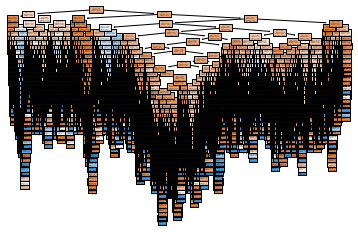

In [35]:
tree.plot_tree(rf_clf_df.estimators_[0], filled = True);

First tree in Random Forest, tuned parameters

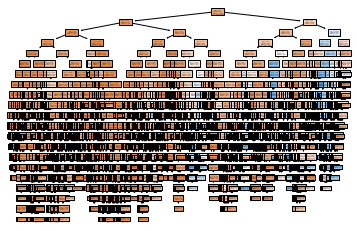

In [34]:
tree.plot_tree(rf_clf_best.estimators_[0], filled = True);

# IV. OVERFITTING EXAMPLES
When running Decision Tree with the default parameters, it is very easy to get overfitting model as the default setting does not set limit for the depth of tree. Hence, the tree keeps expanding until the loss function cannot be reduced.

Also in default setting, the minumum number of samples that is required for a split to work is 2 which is very low. The minimum number of samples at each branch after splitting can also go low to 1. These default settings could lead the decision tree to keep growing until it can't grow anymore. As a result, the model will be very flexible with data in training set and hence will not perform well on test data.

In Decision Tree model, when these default settings are tuned to prevent the tree from getting too large, the accuracy improved by 7%.

# V. Compare two models
Random Forest with same default parameters as in Decicion Tree performs better. However, if Decision Tree can be tuned, it can still reach the same good performance as in Random Forest. In this project, tuning parameters of Random Forest does not help the model to perform any better, possibly due to the limitness of data. In that case, it's not necessary to run Random Forest as it will take longer to run than using a well tuned Decision Tree.

In terms of data, since the target originally is multiclass. There are around 20 classes in *Primary Type*. Hence, amount of data for *Theft* is not as large.